<a href="https://colab.research.google.com/github/Shakeela-Shaik/Cuvette/blob/main/SECTION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Load the dataset and perform data cleaning.**

In [10]:
import pandas as pd
data = pd.read_csv('/StudentsPerformance.csv')

In [20]:
# 1.Handling missing values

print(data.isnull().sum())
#removes rows with missing values
data=data.dropna()

# 2.removing duplicates

data=data.drop_duplicates()

# 3.Data Type conversion

data['math score'] = data['math score'].astype(int)

# 4.Handling Outliers

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['math score']))
data = data[(z < 3)]

# 5.Data transformation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['math score', 'reading score']] = scaler.fit_transform(data[['math score', 'reading score']])






gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**2. Perform EDA using visualizations**

In [21]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt


*Univariate analysis*

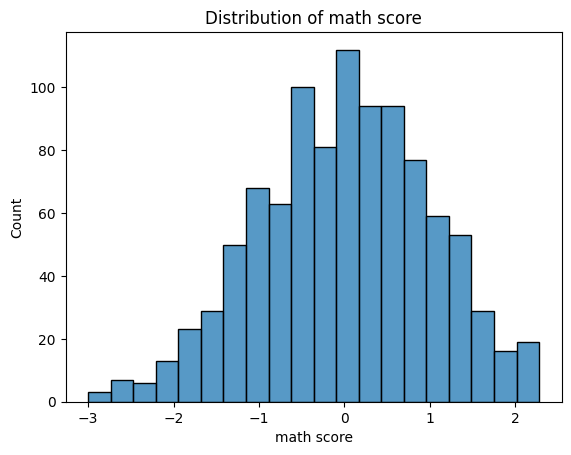

In [25]:
# 1.Histogram
sns.histplot(data['math score'])
plt.title('Distribution of math score')
plt.show()

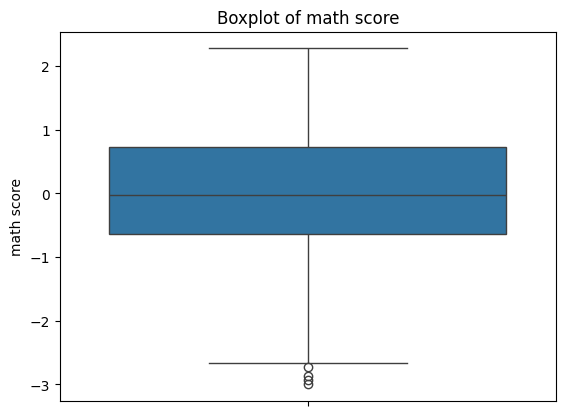

In [26]:
#2.Boxplot
sns.boxplot(data['math score'])
plt.title('Boxplot of math score')
plt.show()

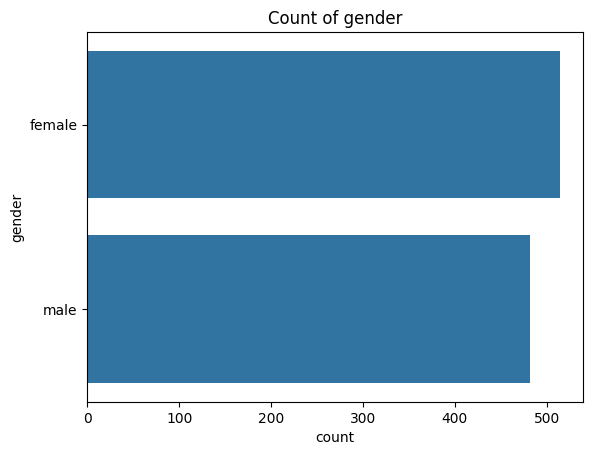

In [27]:
# count plot
sns.countplot(data['gender'])
plt.title('Count of gender')
plt.show()

*Bivariate analysis*

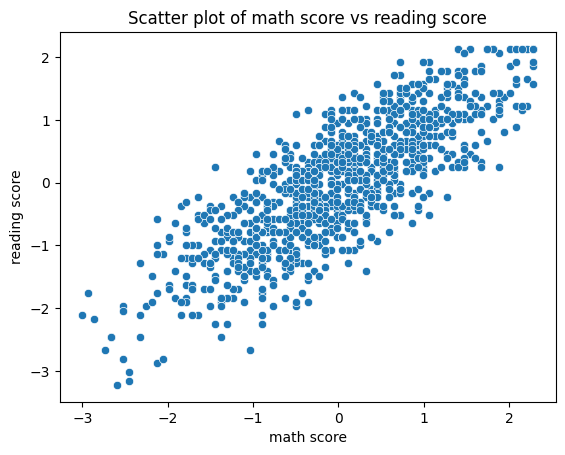

In [28]:
# Scatter plot
sns.scatterplot(x='math score', y='reading score', data=data)
plt.title('Scatter plot of math score vs reading score')
plt.show()

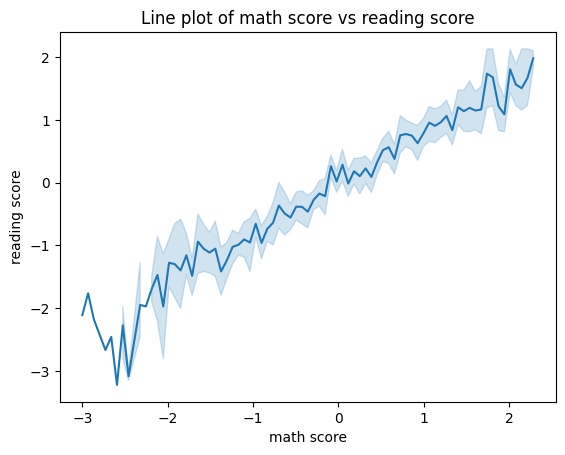

In [29]:
# Line plot
sns.lineplot(x='math score', y='reading score', data=data)
plt.title('Line plot of math score vs reading score')
plt.show()

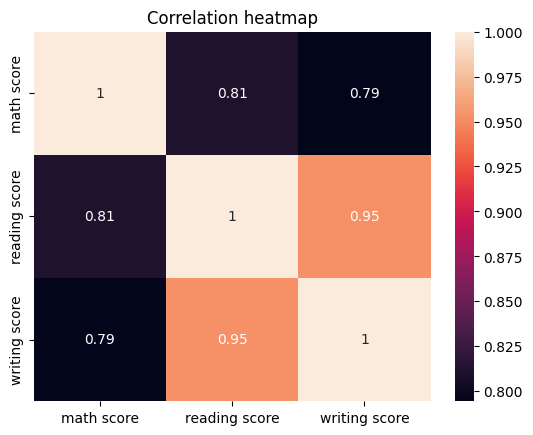

In [31]:
# Heat map
# Select only numeric features for correlation
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation heatmap')
plt.show()

*Multivariate analysis*

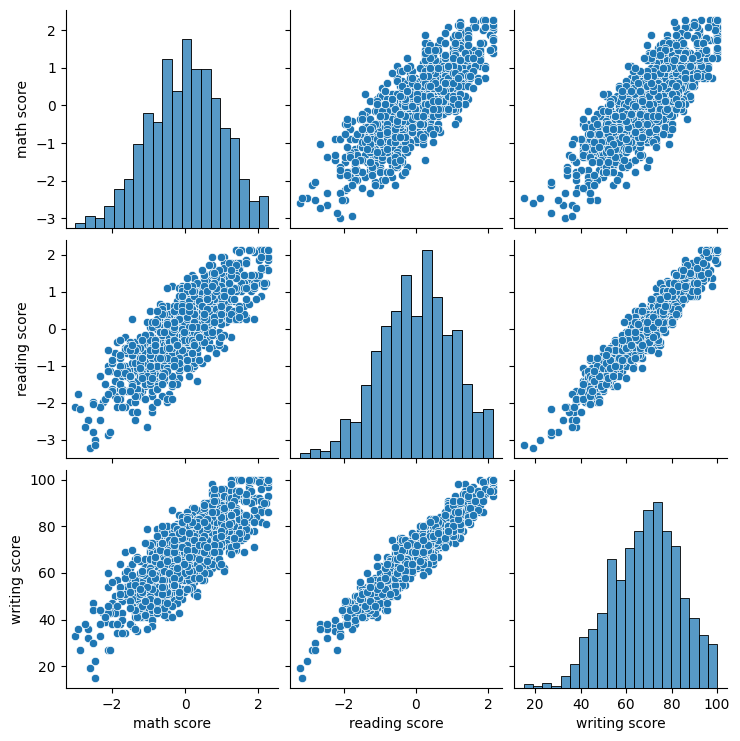

In [32]:
# pair plot
sns.pairplot(data)
plt.show()

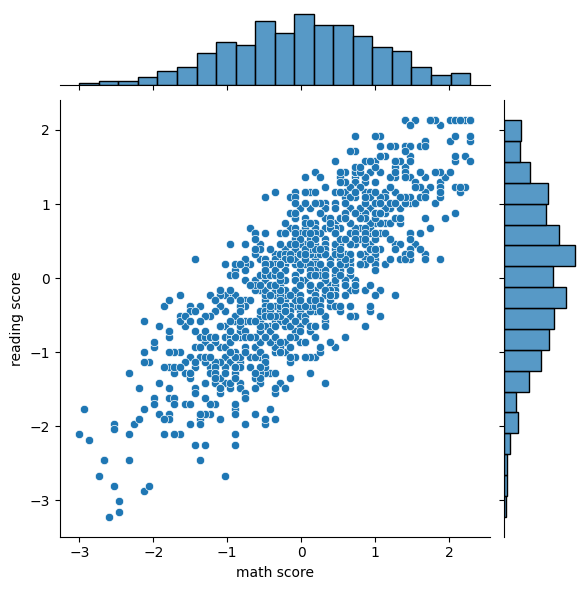

In [33]:
# Joint plot
sns.jointplot(x='math score', y='reading score', data=data)
plt.show()

**3.Prediction analysis**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

*Load and prepare data*

In [37]:
# Assuming you have your data loaded into a DataFrame called 'data'

# Define features (X) and target (y)
X = data[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]

# Create 'pass/fail' column based on a condition, for example, 'math score' >= 60
# Adjust the condition and threshold as needed for your specific case
data['pass/fail'] = np.where(data['math score'] >= 0, 'pass', 'fail')

y = data['pass/fail']  # Now you have a 'pass/fail' column

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Train the model*

In [38]:
# Create and train a Logistic Regression model (example)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*Make Predictions*

In [39]:
# Predict on the testing set
y_pred = model.predict(X_test)

*Evaluate the model*

In [43]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix # Import necessary functions

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, pos_label='pass')  # Use precision_score
print(f"Precision: {precision}")

f1 = f1_score(y_test, y_pred, pos_label='pass')
print(f"F1-Score: {f1}")

recall = recall_score(y_test, y_pred, pos_label='pass')
print(f"Recall: {recall}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.99
Precision: 1.0
F1-Score: 0.9894736842105263
Recall: 0.9791666666666666
[[104   0]
 [  2  94]]


**4.Using Logistic Regression and Random Forest**

*Logistic Regression*

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create and train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, pos_label='pass')
recall_logreg = recall_score(y_test, y_pred_logreg, pos_label='pass')
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label='pass')

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-Score: {f1_logreg}")

Logistic Regression:
Accuracy: 0.99
Precision: 1.0
Recall: 0.9791666666666666
F1-Score: 0.9894736842105263


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Random Forest*

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your data loaded and preprocessed as X_train, X_test, y_train, y_test

# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='pass')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='pass')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='pass')

print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


**5. Evaluating the model using accuracy, confusion matrix, F1-score**

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='pass')
print(f"F1-Score: {f1}")

Accuracy: 0.99
Confusion Matrix:
[[104   0]
 [  2  94]]
F1-Score: 0.9894736842105263


In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# %% [markdown]
# ## Load and Prepare Data

# %%
# Load your dataset
# data = pd.read_csv('/StudentsPerformance.csv')

# Define features (X) and target (y)
X = data[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity',
          'parental level of education', 'lunch', 'test preparation course']]
y = data['pass/fail']  # Assuming you have a 'pass/fail' column

# %% [markdown]
# ## Data Preprocessing

# %%
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'race/ethnicity', 'parental level of education',
                               'lunch', 'test preparation course'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% [markdown]
# ## Model Training

# %%
# Create and train the model (Logistic Regression in this example)
model = LogisticRegression()
model.fit(X_train, y_train)

# %% [markdown]
# ## Model Evaluation

# %%
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='pass')  # Assuming 'pass' is the positive label
print(f"F1-Score: {f1}")

Accuracy: 0.99
Confusion Matrix:
[[104   0]
 [  2  94]]
F1-Score: 0.9894736842105263


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
